In [86]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [87]:
data = pd.read_csv("college_data.csv")
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

<Axes: xlabel='room_board', ylabel='grad_rate'>

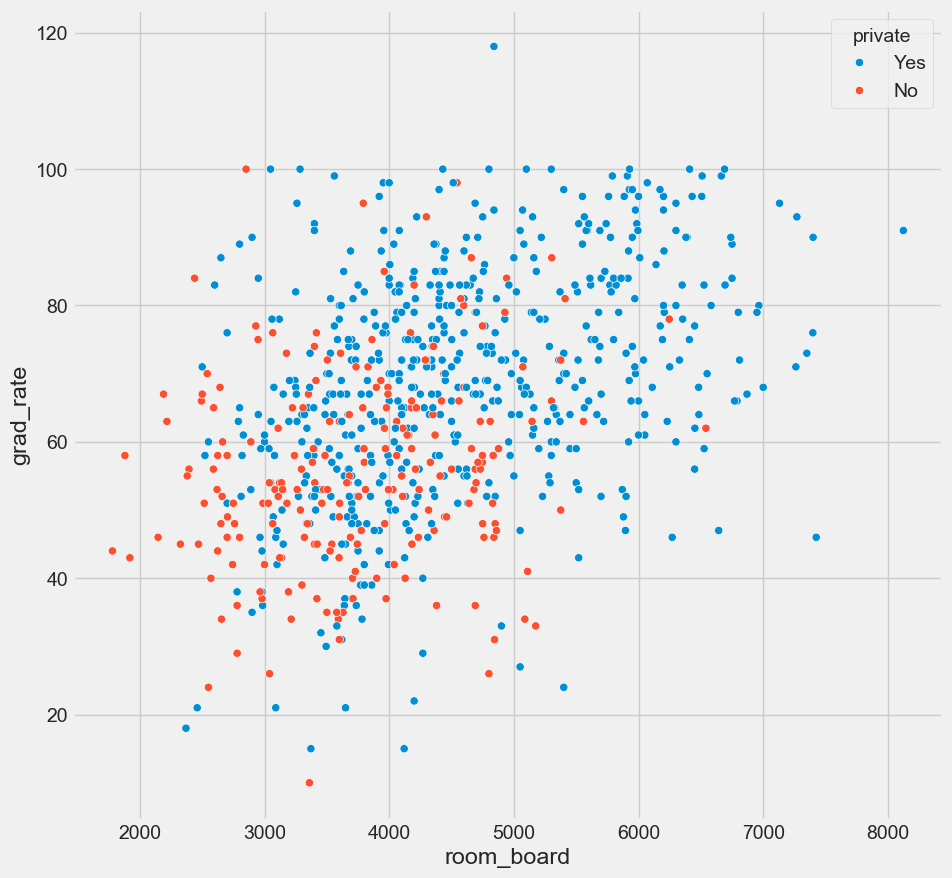

In [89]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'room_board', y = 'grad_rate', data = data, hue = 'private')

<Axes: xlabel='outstate', ylabel='f_undergrad'>

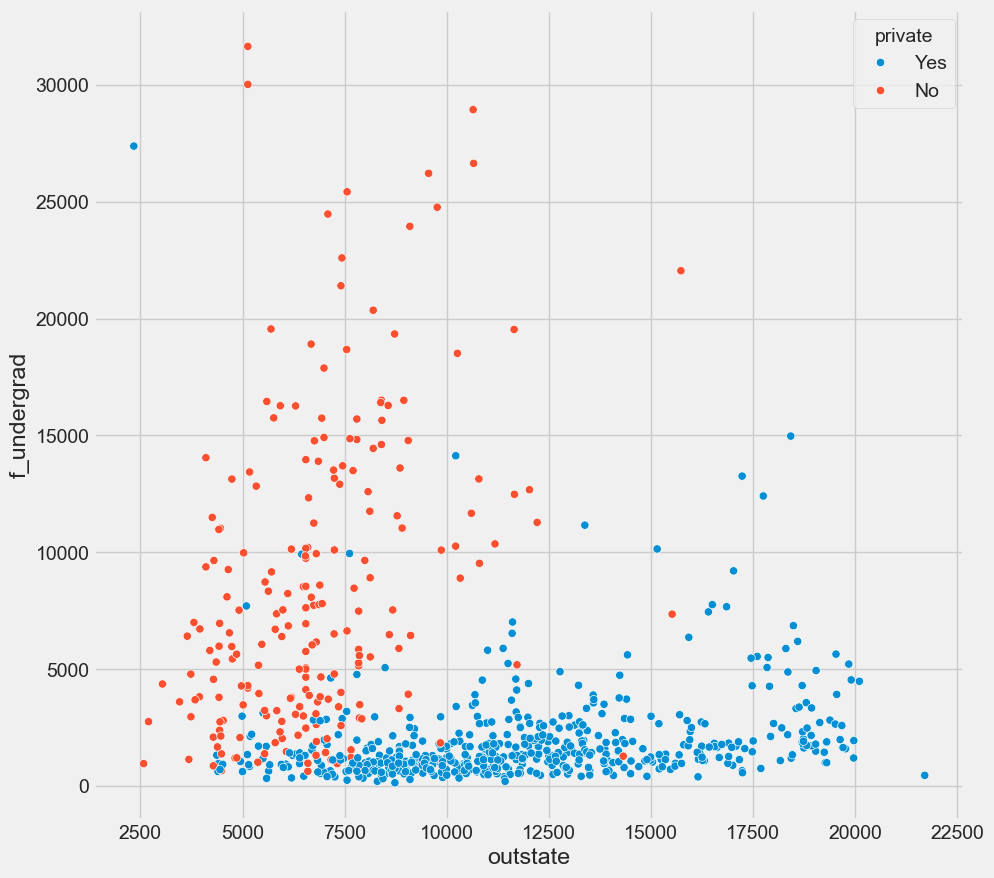

In [90]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

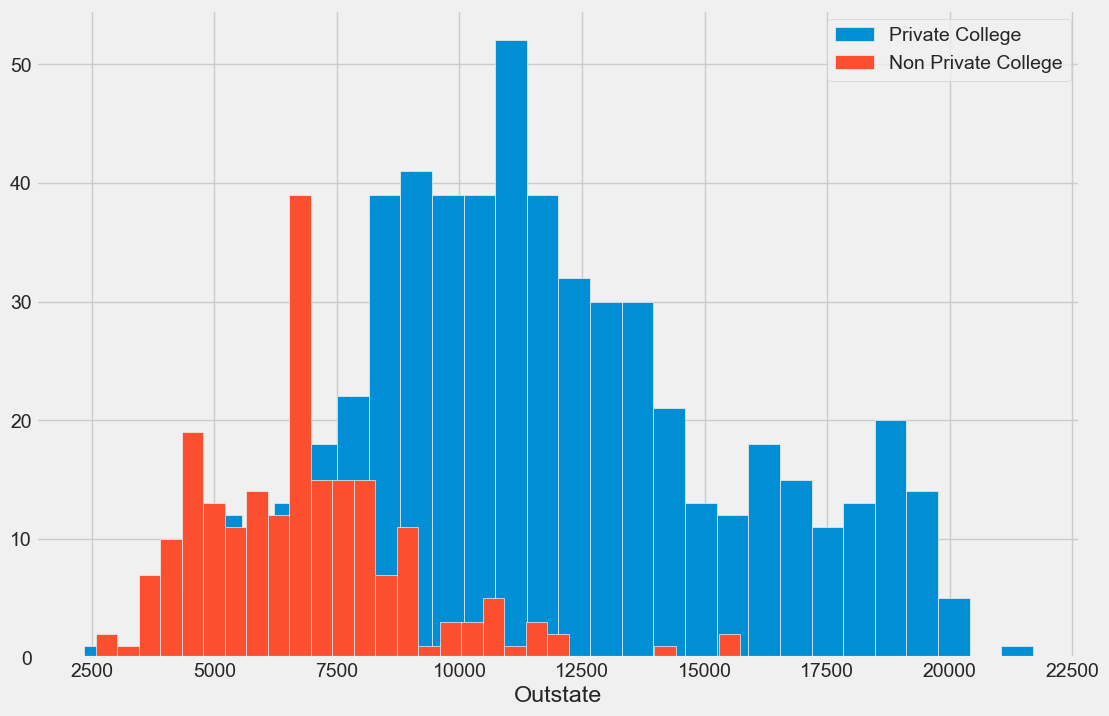

In [91]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

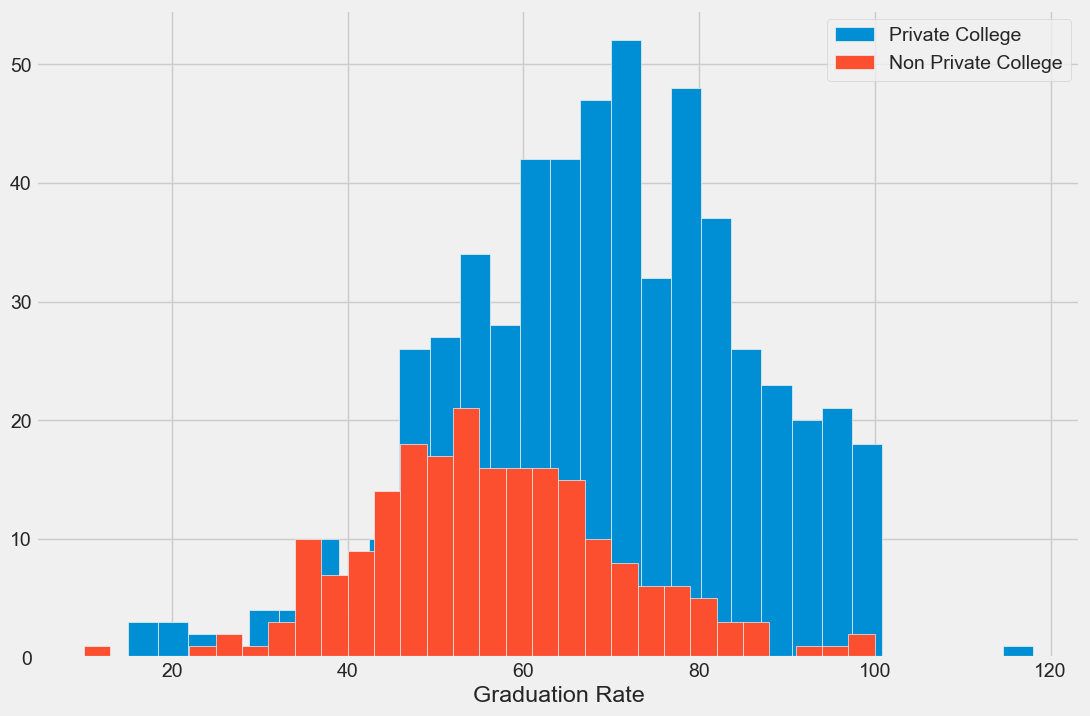

In [92]:

plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [93]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


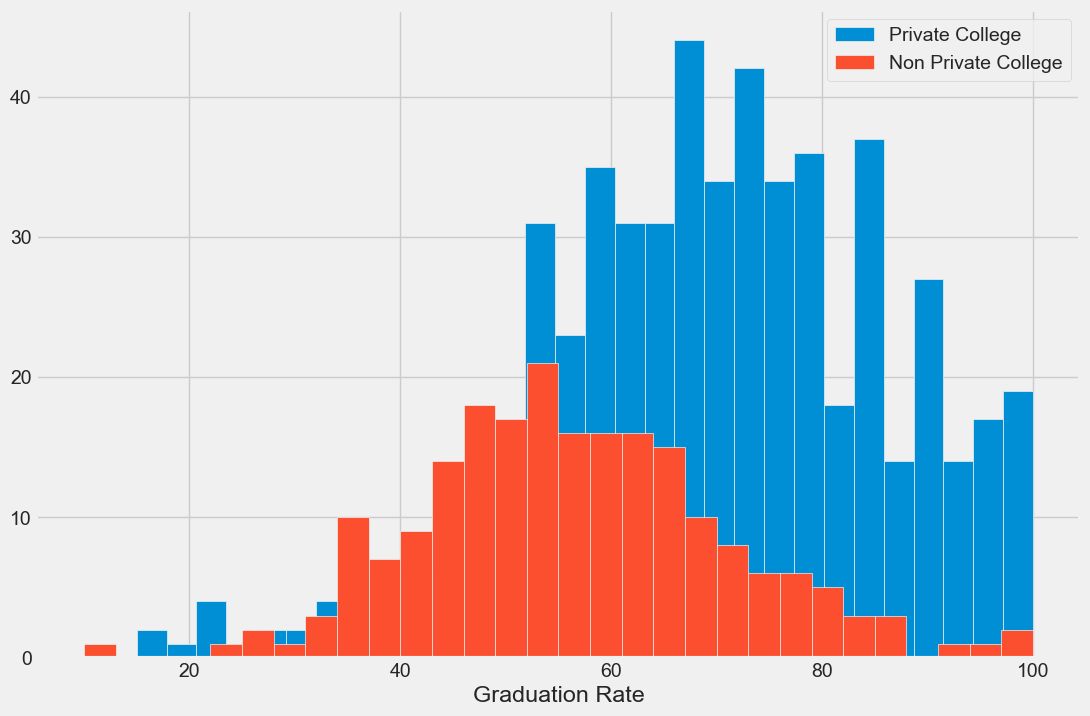

In [94]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)

kmeans.fit(data.drop('private', axis = 1))

KMeans(n_clusters=2)

In [96]:
centers = kmeans.cluster_centers_
centers

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [97]:
predictions = np.array(kmeans.labels_).reshape(-1, )
predictions.shape

(777,)

In [98]:
data['private'] = data.private.astype("category").cat.codes
data['private'] = np.array(data['private']).reshape(-1,)
data['private'].shape

(777,)

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



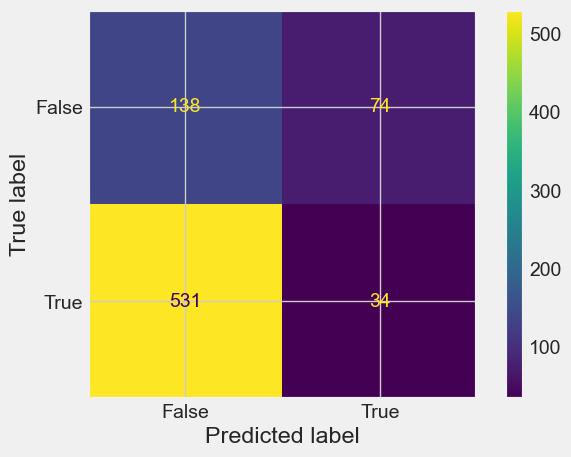

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(confusion_matrix(data['private'], predictions))
print(classification_report(data['private'], predictions))
confusion_matrix = metrics.confusion_matrix(data['private'], np.array(predictions).reshape(-1, ))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

0.22136422136422138
                    0           1  accuracy   macro avg  weighted avg
precision    0.206278    0.314815  0.221364    0.260546      0.285201
recall       0.650943    0.060177  0.221364    0.355560      0.221364
f1-score     0.313280    0.101040  0.221364    0.207160      0.158949
support    212.000000  565.000000  0.221364  777.000000    777.000000


In [101]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
data.private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8